## タイタニック
タイタニック号の事件では、乗客・乗員2224人のうち1502人が死亡した。  
生存には運の要素もありましたが、ある集団は他の集団より生き残る可能性が高かったようです。  
この課題では、この問いに答える予測モデルを構築することを求めます。「乗客のデータ（名前、年齢、性別、社会経済階級など）を使って、「どのような人々がより生き残りやすいか？ を予測するモデルを構築する

In [42]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [6]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Survived – 生存フラグ（0=死亡、1=生存）  
Pclass – チケットクラス  
SibSp – タイタニックに同乗している兄弟/配偶者の数  
parch – タイタニックに同乗している親/子供の数  
ticket – チケット番号  
fare – 料金  
cabin – 客室番号  
Embarked – 出港地（タイタニックへ乗った港）  

In [46]:
# 欠損値の無視
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)


# データの準備 
# "PassengerId", "Name", "Cabin", "ticket", "cabin"は扱いが難しそう or モデルへの影響が少なそうなので、学習データに入れない
x_cols = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
y_col = "Survived"
X_train = train_df[x_cols]
y_train = train_df[y_col]
X_test = test_df[x_cols]


# ダミー変数を作成(カテゴリー変数を0, 1の数字に変換)
X_train = pd.get_dummies(X_train, columns=["Pclass", "Sex", "Embarked"], drop_first=True)
X_test = pd.get_dummies(X_test, columns=["Pclass", "Sex", "Embarked"], drop_first=True)


# # モデル学習
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# # 予測
y_pred = lasso_model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# print(mse)
# print(mae)

lasso_model.coef_
y_pred

array([0.71569337, 0.62471863, 0.74081234, 0.70692695, 0.62613602,
       0.67826396, 0.62614279, 0.61258442, 0.59118645, 0.69921428,
       0.80656811, 0.66488812, 0.78004333, 0.85523606, 0.65766424,
       0.70195214, 0.66535285, 0.75313072, 0.76130384, 0.5775189 ,
       0.65461294, 0.68466049, 0.54039619, 0.63439431, 0.68931215,
       0.64318183, 0.66768994, 0.74871905, 0.66902551, 0.66191772,
       0.58571852, 0.69831211, 0.71622231, 0.7788444 , 0.62052341,
       0.61511389, 0.59843257, 0.64752493, 0.5821831 , 0.67045283,
       0.71473631, 0.80065424, 0.80225828, 0.72340665, 0.65064123,
       0.62998583, 0.70409198, 0.67638664, 0.65686942, 0.57749146,
       0.64829418, 0.67475757, 0.63880943, 0.7349562 , 0.63633302,
       0.73822545, 0.71242412, 0.61737361, 0.54859993, 0.73391131,
       0.61774161, 0.64273742, 0.64265799, 0.66463848, 0.66479278,
       0.72598691, 0.63219991, 0.65942811, 0.85640651, 0.63255238,
       0.59404313, 0.57973556, 0.6932408 , 0.72052706, 0.58188

In [45]:
# 提出結果の作成
sub = pd.read_csv("gender_submission.csv")
sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Text(0, 0.5, 'standardized coefficients')

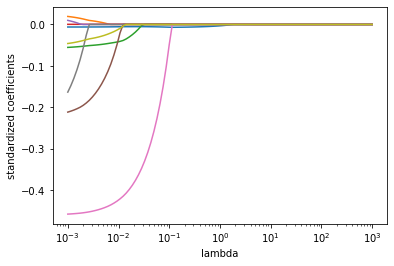

In [43]:
# 様々なλでLassoの係数を比較
lambda_list = np.logspace(-3, 3, 100)

mse_list = []
coefs = []
for lmd in lambda_list:
    # モデル学習
    lasso_model = Lasso(alpha=lmd)
    lasso_model.fit(X_train, y_train)

    # 予測
    y_pred = lasso_model.predict(X_test)

    # mse = mean_squared_error(y_test, y_pred)
    # mse_list.append(mse)
    coefs.append(lasso_model.coef_)
    
plt.plot(lambda_list, coefs)
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("standardized coefficients")

In [44]:
X_train

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
1,38.0,1,0,71.2833,0,0,0,0,0
3,35.0,1,0,53.1000,0,0,0,0,1
6,54.0,0,0,51.8625,0,0,1,0,1
10,4.0,1,1,16.7000,0,1,0,0,1
11,58.0,0,0,26.5500,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
871,47.0,1,1,52.5542,0,0,0,0,1
872,33.0,0,0,5.0000,0,0,1,0,1
879,56.0,0,1,83.1583,0,0,0,0,0
887,19.0,0,0,30.0000,0,0,0,0,1
